In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
from sklearn.datasets import load_iris

In [134]:
iris=load_iris()
df=sns.load_dataset('iris')

In [135]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [136]:
#independent feature and dependent features
X=df.iloc[:,:-1]
y=iris.target

In [137]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [138]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [139]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [140]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Train Test Split

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Applying - DT without any Pruning

In [142]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
clf = DecisionTreeClassifier()

In [144]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5416666666666666, 0.9285714285714286, 'petal_width <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]\nclass = versicolor'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = setosa'),
 Text(0.5, 0.8571428571428572, 'True  '),
 Text(0.625, 0.7857142857142857, 'petal_width <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]\nclass = versicolor'),
 Text(0.5833333333333333, 0.8571428571428572, '  False'),
 Text(0.4166666666666667, 0.6428571428571429, 'petal_length <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]\nclass = versicolor'),
 Text(0.3333333333333333, 0.5, 'sepal_length <= 4.95\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]\nclass = versicolor'),
 Text(0.16666666666666666, 0.35714285714285715, 'sepal_width <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.25,

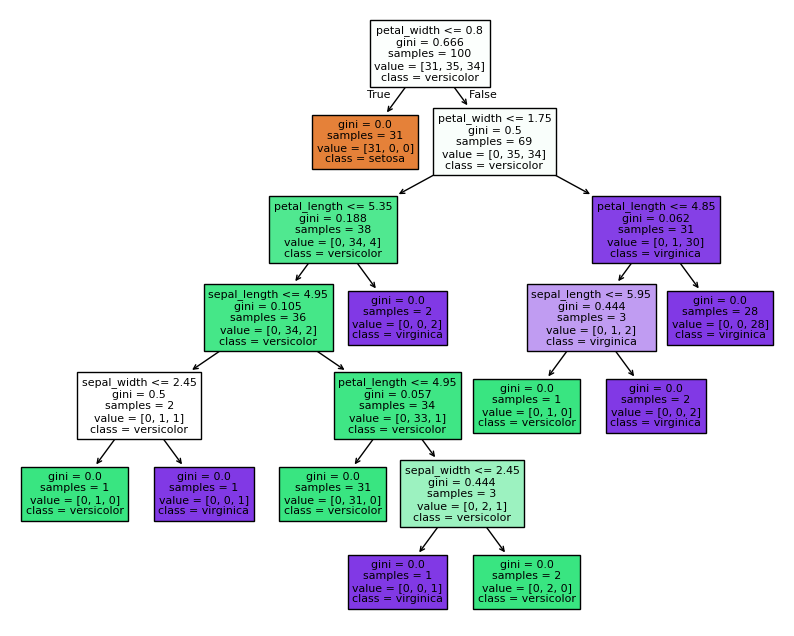

In [145]:
from sklearn import tree
plt.figure(figsize=(10,8))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=df['species'].unique())

In [146]:
#prediction
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [147]:
from sklearn.metrics import accuracy_score,classification_report

In [148]:
accuracy_score(y_test, y_pred)

0.98

In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### Applying DT with Post-Pruning

In [150]:
# setting max_depth = 2
clf2 = DecisionTreeClassifier(max_depth=2)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal_width <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]\nclass = versicolor'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = setosa'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'petal_width <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]\nclass = versicolor'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]\nclass = virginica')]

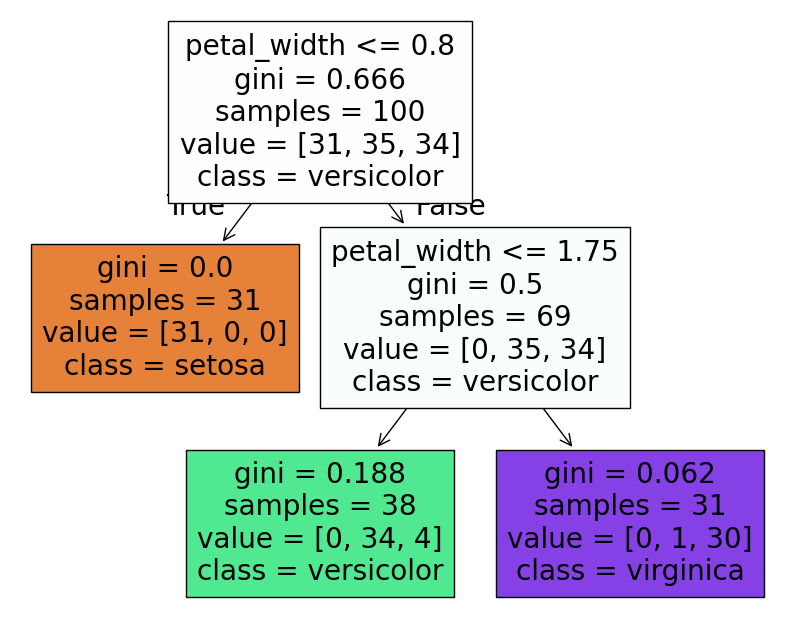

In [151]:
from sklearn import tree
plt.figure(figsize=(10,8))
tree.plot_tree(clf2, filled=True, feature_names=X.columns, class_names=df['species'].unique())

In [152]:
#prediction
y_pred2 = clf2.predict(X_test)
y_pred2

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [153]:
accuracy_score(y_test, y_pred2)

0.98

In [154]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

